# Volatility
## -More complicated Pandas
## -Rolling operations

In [1]:
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

raw = yf.download('SPY AAPL', start = '2010-01-01', end = '2019-12-31')
raw

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns] # using a list comprehension to extract the first entry for each tuple in 
                                        # the multi-index from .columns ^above^
    df.columns = outer
    return df

(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
)

import yfinance as yf
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns] 
    df.columns = outer
    return df

def tweak_data():
    raw = yf.download('SPY AAPL', start = '2010-01-01', end = '2019-12-31')
                    
    return(raw
     .iloc[:, :-2:2] # :-2:2 takes out volume, ::2 leaves volume in
     .pipe(fix_cols)
)
                      
tweak_data()


# TO define apple data
aapl = (raw
        .iloc[:,::2]
        .pipe(fix_cols))

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


In [2]:
# To take the mean of the 'Close' Column

(aapl
 .Close
 .mean()
)

27.568102107796943

In [3]:
(aapl
 .Close
 .std()
)

14.016253049378737

In [4]:
# Creating a new column called 'pct_change_close' which takes the %Change. THEN taking std of that columns values

(aapl
 .assign(pct_change_close=aapl.Close.pct_change())
 .pct_change_close
 .std()
)

0.01623613318144792

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

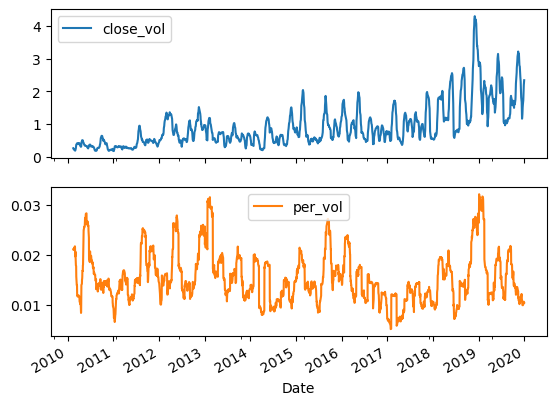

In [6]:
(aapl
 .assign(close_vol = aapl.rolling(30).Close.std(), # taking a std of the close values of the previous 30 days
         per_vol = aapl.Close.pct_change().rolling(30).std()) # The std of the %changes in the close values
 .iloc[ : , -2:] # all rows, *2 from end(close_vol)---> last 2 columns
 .plot(subplots = True)
)

## 15 day volatility

In [7]:
(aapl
 .assign(pct_change_close = aapl.Close.pct_change())
 .resample('15D')
 .std()
)

,Adj Close,Close,High,Low,Open,Volume,pct_change_close
Date,,,,,,,
2010-01-04,0.078267,0.091958,0.072060,0.101749,0.080372,7.028347e+07,0.010383
2010-01-19,0.227369,0.267141,0.253188,0.232856,0.234097,4.361002e+08,0.030046
2010-02-03,0.113359,0.133188,0.102614,0.124059,0.123349,1.455474e+08,0.017088
2010-02-18,0.137291,0.161306,0.138608,0.166270,0.157960,9.844200e+07,0.011254
2010-03-05,0.074477,0.087505,0.088090,0.113449,0.129484,1.951401e+08,0.014002
...,...,...,...,...,...,...,...
2019-10-29,1.748353,1.725581,1.449098,2.018594,1.418779,2.960150e+07,0.013412
2019-11-13,0.516260,0.527773,0.404718,0.436709,0.509585,1.787058e+07,0.009868
2019-11-28,0.977055,0.998849,1.019784,0.918851,0.936544,2.826525e+07,0.012526


## 15 day rolling volatility

In [8]:
(aapl
 .assign(pct_change_close = aapl.Close.pct_change())
 .rolling(window = 15, min_periods = 15)
 .std()
)

,Adj Close,Close,High,Low,Open,Volume,pct_change_close
Date,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-12-23,1.847550,1.888754,1.932242,1.953716,1.906586,4.891036e+07,0.010997
2019-12-24,1.736156,1.774875,1.762143,1.842910,1.836871,5.206250e+07,0.009136
2019-12-26,1.757922,1.797126,1.757091,1.821097,1.758186,5.084715e+07,0.009786


## Note: if column name conflicts with method we need to use index access ([])

<AxesSubplot:xlabel='Date'>

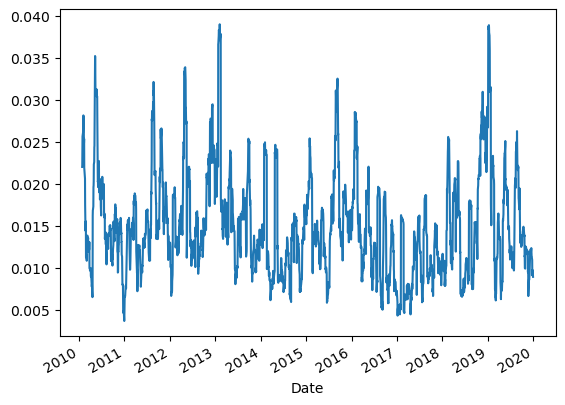

In [10]:
(aapl
 .assign(pct_change = aapl.Close.pct_change())
 .rolling(window = 15, min_periods = 15)
 .std()
 ['pct_change']
 .plot()
)